In [1]:
import pandas as pd

data = pd.read_csv('./article_click_log.csv')
data.head()

,timestamp,displayed_article_id,user_click,user_features,datetime
0,1317513301,id-565533,0,user 1 8 11 36 13 22 23 16 18 24 26 17 45 19 4...,2011-10-02 08:55:01
1,1317513328,id-560518,0,user 1 13 18 26 17 45 19 15 14 39 66 104 20,2011-10-02 08:55:28
2,1317513333,id-560518,0,user 1 7 11 13 23 16 18 17 35 25 15 14 30 50 27,2011-10-02 08:55:33
3,1317513339,id-560518,0,user 1 9 11 36 13 23 33 32 16 18 24 17 35 19 2...,2011-10-02 08:55:39
4,1317513346,id-563643,0,user 1 13 23 16 18 26 17 19 29 15 14 30 27 20,2011-10-02 08:55:46


In [2]:
data['displayed_article_id'].value_counts()

id-563643    479
id-560518    478
id-565533    468
Name: displayed_article_id, dtype: int64

In [3]:
data.groupby('displayed_article_id')['user_click'].value_counts()

displayed_article_id  user_click
id-560518             0             475
                      1               3
id-563643             0             460
                      1              19
id-565533             0             448
                      1              20
Name: user_click, dtype: int64

In [39]:
import numpy as np

class ThompsonSamplingMAB:
    def __init__(self, article_ids):
        self.article_ids = article_ids
        self.alpha = {article: 1 for article in article_ids} 
        self.beta = {article: 1 for article in article_ids}

    def select_article(self):
        sampled_values = {article: np.random.beta(self.alpha[article], self.beta[article]) 
                          for article in self.article_ids}
        return max(sampled_values, key=sampled_values.get)

    def update(self, article_id, reward):
        if reward == 1:
            self.alpha[article_id] += 1 
        else:
            self.beta[article_id] += 1 

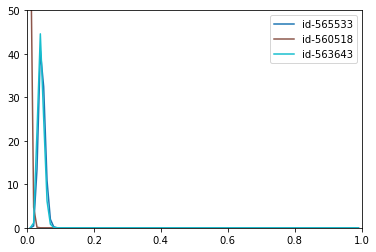

In [40]:
from numpy import linspace

from scipy.special import beta as betaf

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

article_pool = data['displayed_article_id'].unique()
mab = ThompsonSamplingMAB(article_pool)

click_data = data[['displayed_article_id','user_click']]

x = linspace(.01, .99, 99)
cmap = plt.cm.get_cmap("tab10", len(article_pool))

for index, row in click_data.iterrows():
    article_id = row['displayed_article_id']
    
    mab.update(article_id, row['user_click'])

    plt.xlim([0, 1]) 
    plt.ylim([0, 50]) 
    for aidx, article in enumerate(article_pool):
        alpha, beta = mab.alpha[article], mab.beta[article]
        y = (1 / betaf(alpha, beta)) * x ** (alpha - 1) * (1 - x) ** (beta - 1)
        plt.plot(x, y, color=cmap(aidx), label=article)
    plt.legend(loc="best")
    plt.show()
    display.clear_output(wait=True)


In [41]:
def display_mab_state(mab):
    for article_id in mab.article_ids:
        alpha, beta = mab.alpha[article_id], mab.beta[article_id]
        ctr = alpha / (alpha + beta)
        print(f"Article ID: {article_id}, α: {alpha}, β: {beta}, CTR: {ctr:.2f}")

display_mab_state(mab)

Article ID: id-565533, α: 21, β: 449, CTR: 0.04
Article ID: id-560518, α: 4, β: 476, CTR: 0.01
Article ID: id-563643, α: 20, β: 461, CTR: 0.04


### Test

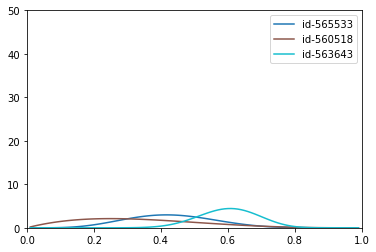

Article :  id-563643


ValueError: invalid literal for int() with base 10: ''

In [43]:
article_pool = data['displayed_article_id'].unique()
mab = ThompsonSamplingMAB(article_pool)

x = linspace(.01, .99, 99)
cmap = plt.cm.get_cmap("tab10", len(article_pool))

# Random selection in the beginning
random_iter_num = 10
for iter in range(random_iter_num):
        article_id = np.random.choice(article_pool)
        user_click = int(input()) # CLICK O : 1, X : 0
        mab.update(article_id, user_click)

# Random selection in Beta distribution
while(True):
    article_id = mab.select_article()
    print("Article : ", article_id)
    user_click = int(input()) # CLICK O : 1, X : 0
    mab.update(article_id, user_click)
    
    plt.xlim([0, 1]) 
    plt.ylim([0, 50]) 
    for aidx, article in enumerate(article_pool):
        alpha, beta = mab.alpha[article], mab.beta[article]
        y = (1 / betaf(alpha, beta)) * x ** (alpha - 1) * (1 - x) ** (beta - 1)
        plt.plot(x, y, color=cmap(aidx), label=article)

    plt.legend(loc="best")
    display.clear_output(wait=True)
    plt.draw()
    plt.pause(0.5)
    
    

In [44]:
def display_mab_state(mab):
    for article_id in mab.article_ids:
        alpha, beta = mab.alpha[article_id], mab.beta[article_id]
        ctr = alpha / (alpha + beta)
        print(f"Article ID: {article_id}, α: {alpha}, β: {beta}, CTR: {ctr:.2f}")

display_mab_state(mab)

Article ID: id-565533, α: 6, β: 8, CTR: 0.43
Article ID: id-560518, α: 2, β: 4, CTR: 0.33
Article ID: id-563643, α: 18, β: 12, CTR: 0.60
